In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
                                                                                                                                                                                                                                                            
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [2]:
# Read the City and Ride Data

df_cityData = pd.read_csv(city_data_to_load)
df_rideData = pd.read_csv(ride_data_to_load)

In [3]:
df_cityData.head()
# cityData[df_cityData['city'] == 'Lake Jonathanshire']['driver_count'].item()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
df_rideData.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:

AverageFare = df_rideData.groupby('city')[['fare']].mean()
NumOfRides = df_rideData.groupby('city')[['ride_id']].count()

cityRideSum_df = pd.merge(NumOfRides, AverageFare, on='city')
cityRideSum_df.head()

,ride_id,fare
city,,
Amandaburgh,18,24.641667
Barajasview,22,25.332273
Barronchester,16,36.422500
Bethanyland,18,32.956111
Bradshawfurt,10,40.064000


In [6]:
cityRideSum_df.head()

,ride_id,fare
city,,
Amandaburgh,18,24.641667
Barajasview,22,25.332273
Barronchester,16,36.422500
Bethanyland,18,32.956111
Bradshawfurt,10,40.064000


In [7]:
# Combine the data into a single dataset
driver_count = []
city_type = []
for index, row in cityRideSum_df.iterrows():
    driver_count.append(df_cityData[df_cityData['city'] == index]['driver_count'].item())
    city_type.append(df_cityData[df_cityData['city'] == index]['type'].item())
cityRideSum_df['driver_count'] = driver_count
cityRideSum_df['city_type'] = city_type

In [8]:
# Display the data table for preview

cityRideSum_df.rename(columns={'ride_id':'# of Rides',
                              'fare':'Average Fare',
                              'driver_count':'# of Drivers',
                              'city_type':'Type'}, 
                 inplace=True)
cityRideSum_df.head()

,# of Rides,Average Fare,# of Drivers,Type
city,,,,
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


## Bubble Plot of Ride Sharing Data

In [9]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


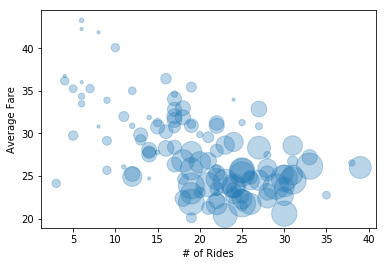

In [10]:
# plt.scatter(features[0], features[1], alpha=0.2,
#             s=100*features[3], c=iris.target, cmap='viridis')
# plt.xlabel(iris.feature_names[0])
# plt.ylabel(iris.feature_names[1]);




sp = cityRideSum_df.plot.scatter(y='Average Fare', x='# of Rides', s= cityRideSum_df['# of Drivers']*10, alpha=0.3)

#couldn't figure out how to sassign specific color to a type - RJ
                           

In [12]:
# Save Figure
plt.savefig('BubblePlot.png')

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [13]:
# Calculate Type Percents
# Combine the data into a single dataset
left = df_rideData.copy()
right = df_cityData.copy()

df_rideType = pd.merge(left, right, on='city')
# df_rideType.head()

In [14]:
# Create dataframe containing ride count by type
typeSumFares = df_rideType.groupby('type')[['fare']].sum()

typeSumFares.rename(columns={'fare':'Total Fare'}, inplace=True)


In [15]:
typeSumFares.head()

,Total Fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


Text(0, 0.5, '')

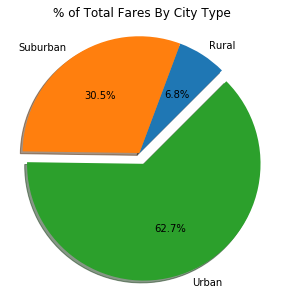

In [16]:
# Build Pie Chart
explode = (0, 0, 0.1)

SumFares = typeSumFares.plot.pie(y= 'Total Fare',
                                 autopct='%1.1f%%' ,
                                 explode = explode ,
                                 legend=False , 
                                 title = '% of Total Fares By City Type' ,
                                 shadow=True, startangle=45 ,
                                 figsize=(5,5) )
plt.axis('scaled')                              
SumFares.set_ylabel('')

In [17]:
# Save Figure
plt.savefig('TotalFares.png')

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

Text(0, 0.5, '')

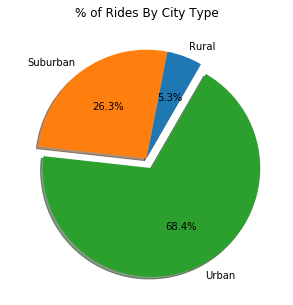

In [18]:
# Calculate Ride Percents



# Create dataframe containing ride count by type
typeNumOfRides = df_rideType.groupby('type')[['ride_id']].count()

typeNumOfRides.rename(columns={'ride_id':'# of Rides'}, inplace=True)

# Build Pie Chart
TypesRides = typeNumOfRides.plot.pie(y= '# of Rides', 
                                     legend=False ,
                                     title = '% of Rides By City Type' ,
                                     explode = explode ,
                                     autopct='%1.1f%%',
                                     shadow=True, startangle=60 ,
                                     figsize=(5,5))
TypesRides.set_ylabel('')

In [19]:
# Save Figure
plt.savefig('RidesType.png')

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

Text(0, 0.5, '')

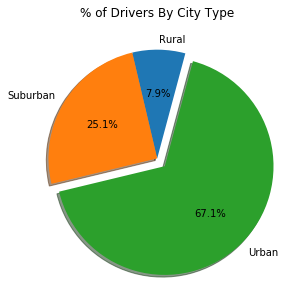

In [20]:
# Calculate Driver Percents
typeNumOfDrivers = df_rideType.groupby('type')[['driver_count']].mean()

typeNumOfDrivers.rename(columns={'driver_count':'# of Drivers'}, inplace=True)

typeNumOfDrivers.head()

# Build Pie Charts
TypesDrivers = typeNumOfDrivers.plot.pie(y= '# of Drivers',
                                       autopct='%1.1f%%' ,
                                       title = '% of Drivers By City Type' ,
                                       explode = explode ,
                                       legend=False ,
                                       shadow=True, startangle=75 ,
                                       figsize=(5,5))
TypesDrivers.set_ylabel('')




In [21]:
# Save Figure
plt.savefig('DriversCity.png')

<Figure size 432x288 with 0 Axes>